원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [17]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [19]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

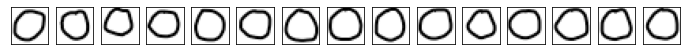

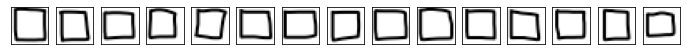

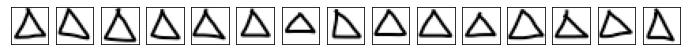

In [4]:
# train datasets
shapes = ["circle", "rectangle", "triangle"]
for shape in shapes:
    dir_name = f"handwriting/train/{shape}"
    plt.figure(figsize = (12,1))
    for i, fname in enumerate(glob(f"{dir_name}/*.png")):
        img = Image.open(fname)
        plt.subplot(1,15, i+1), plt.imshow(img),
        plt.xticks([]), plt.yticks([])
    plt.show()

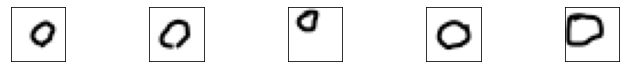

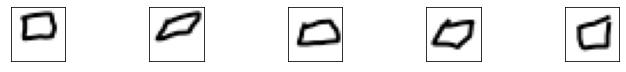

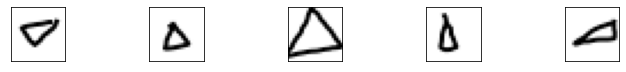

In [20]:
# test datasets
shapes = ["circle", "rectangle", "triangle"]
for shape in shapes:
    dir_name = f"hard_handwriting/test/{shape}"
    plt.figure(figsize = (12,1))
    for i, fname in enumerate(glob(f"{dir_name}/*.png")):
        img = Image.open(fname)
        plt.subplot(1,5, i+1), plt.imshow(img),
        plt.xticks([]), plt.yticks([])
    plt.show()

In [6]:
import numpy as np
import cv2
cv2.imread("handwriting/train/circle/circle001.png")[:,:,::-1].shape

(24, 24, 3)

- 데이터셋 생성하기

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
train_data_generator = train_datagen.flow_from_directory(
    "handwriting/train", target_size=(24,24), batch_size = 3, class_mode = "categorical"
)

Found 45 images belonging to 3 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale = 1/255.)
test_data_generator = test_datagen.flow_from_directory(
    "hard_handwriting/test", target_size=(24,24), batch_size = 3, class_mode = "categorical"
)

Found 15 images belonging to 3 classes.


In [22]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [23]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정/학습/평가

In [24]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [25]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [28]:
model = Sequential([
        Conv2D(32, (3,3), input_shape=(24,24,3), activation = "relu"),
        Conv2D(32, (3,3), activation = "relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation = "relu"),
        Dense(3, activation = "softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               409728    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [29]:
model.compile(optimizer = "adam", loss= "categorical_crossentropy", metrics = ["accuracy"])

In [30]:
model.fit(
    train_data_generator, steps_per_epoch =15, epochs = 50,
    validation_data = test_data_generator, validation_steps = 5
)

Epoch 1/50
15/15 [==============================] - 1s 28ms/step - loss: 0.8057 - accuracy: 0.6889 - val_loss: 1.4274 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.1372 - accuracy: 1.0000 - val_loss: 3.3919 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 4.1027 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.6867 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.8938 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 16ms/step - loss: 6.6048e-04 - accuracy: 1.0000 - val_loss: 5.0415 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 16ms/step - loss: 4.7326e-04 - accuracy: 1.0000 - val_loss: 5.1507 - val_accuracy: 0.3333
Epoch

In [32]:
model.evaluate(test_data_generator, steps = 5)

5/5 [==============================] - 0s 6ms/step - loss: 5.9905 - accuracy: 0.4000


[5.990455150604248, 0.4000000059604645]

In [33]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 6ms/step - loss: 5.9905 - accuracy: 0.4000


[5.99045467376709, 0.4000000059604645]